In [8]:
#import the necessary packages
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('data/spam.csv', encoding='ansi')
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


## 1. Data Cleaning

In [10]:
#remove the unnamed column
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [11]:
#rename the columns
df.rename(columns={'v1':'label', 'v2':'text'}, inplace=True)
df.head(2)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [12]:
df['label'] = (df['label'] == 'spam').astype(int)
df.sample(5)

,label,text
4042,0,I am literally in bed and have been up for lik...
3892,0,Have you heard from this week?
686,0,Every King Was Once A Crying Baby And Every Gr...
4187,0,Mm umma ask vava also to come tell him can pla...
2256,0,"Just checked out, heading out to drop off my s..."


In [13]:
#count duplicates
df.duplicated().sum()

403

In [14]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## 2. EDA

In [15]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.value_counts('label')

label
0    4516
1     653
Name: count, dtype: int64

In [17]:
#plot the distribution of the labels using pie chart
import matplotlib.pyplot as plt

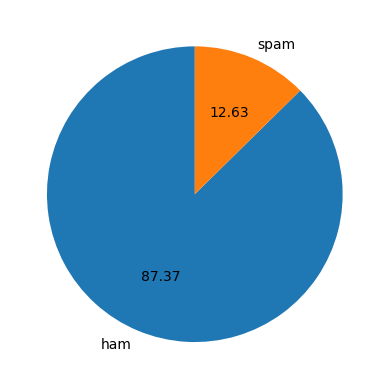

In [18]:
plt.pie(df.value_counts('label'), labels=['ham', 'spam'], autopct='%0.2f', startangle=90)
plt.show()

In [19]:
#install nltk and punkt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhinav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters'] = df['text'].apply(len)
df.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
import seaborn as sns

In [23]:
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

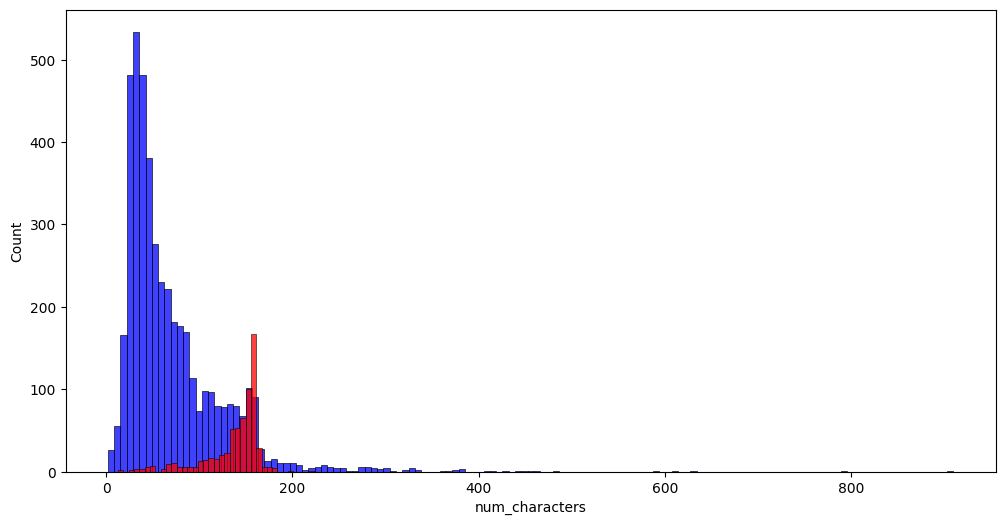

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_characters'], color='blue', label='Ham')
sns.histplot(df[df['label'] == 1]['num_characters'], color='red', label='Spam')

<Axes: xlabel='num_words', ylabel='Count'>

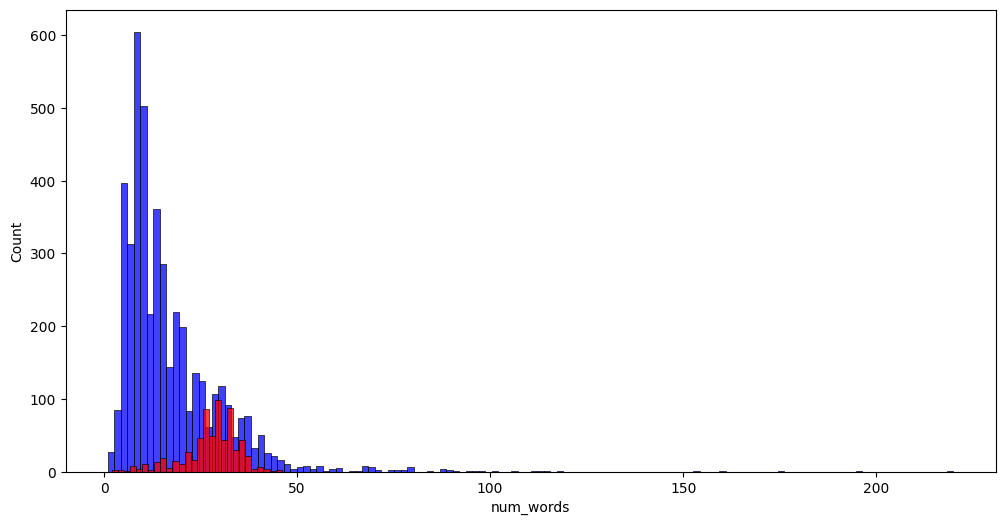

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_words'], color='blue', label='Ham')
sns.histplot(df[df['label'] == 1]['num_words'], color='red', label='Spam')

<Axes: xlabel='num_sentences', ylabel='Count'>

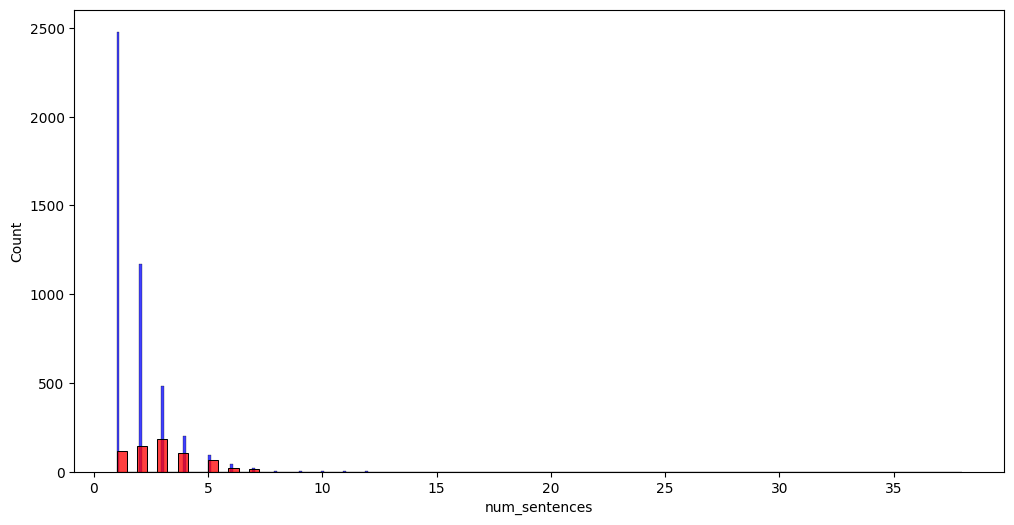

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_sentences'], color='blue', label='Ham')
sns.histplot(df[df['label'] == 1]['num_sentences'], color='red', label='Spam')

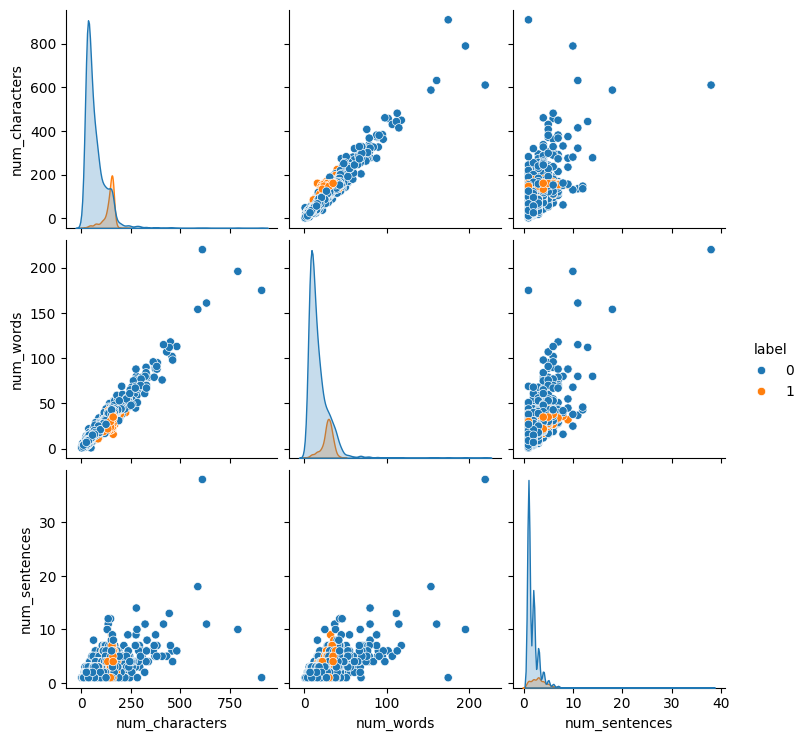

In [28]:
sns.pairplot(df, hue='label', vars=['num_characters', 'num_words', 'num_sentences'])

In [29]:
df[['label', 'num_characters', 'num_words', 'num_sentences']].corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

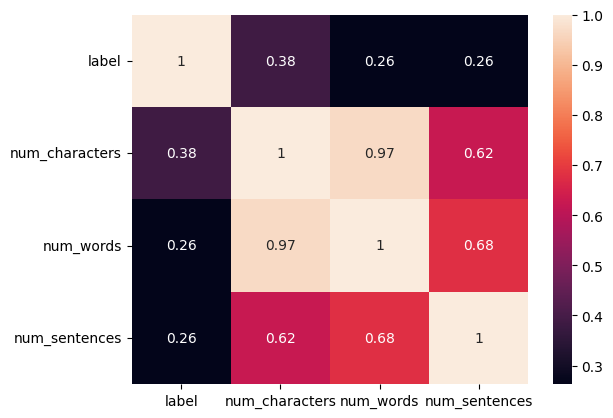

In [30]:
sns.heatmap(df[['label', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

## 3. Data Preprocessing

- Lowercase
- Tokenization
- Remove Stopwords
- Remove Punctuation and Special Characters
- Stemming

In [31]:
text = "This is Sample ## Text message to be pro'cessed. Please process it! ."

In [32]:
text = text.lower()
text

"this is sample ## text message to be pro'cessed. please process it! ."

In [33]:
text = nltk.word_tokenize(text)
text

['this',
 'is',
 'sample',
 '#',
 '#',
 'text',
 'message',
 'to',
 'be',
 "pro'cessed",
 '.',
 'please',
 'process',
 'it',
 '!',
 '.']

In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhinav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
from string import punctuation

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('processing')

'process'

In [37]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    L = []

    for word in text:
        if word in stopwords.words('english') or word in punctuation:
            continue
        if word.isalnum():
            L.append(ps.stem(word))

    return ' '.join(L)

In [38]:
transform(text)

AttributeError: 'list' object has no attribute 'lower'

In [39]:
df['text'].apply(transform)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [40]:
df['transformed_text'] = df['text'].apply(transform)

In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=700, height=500, background_color='white', min_font_size=12)

In [42]:
spam_wc = wc.generate(' '.join(df[df['label'] == 1]['transformed_text']))

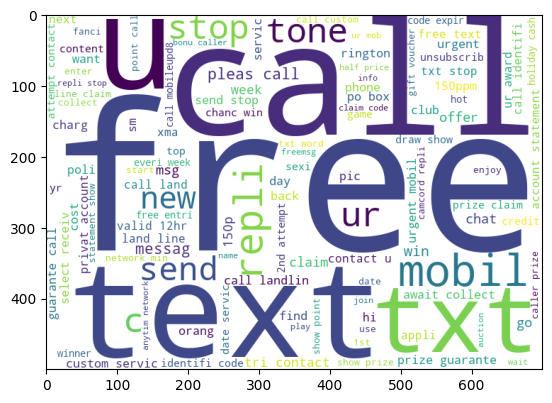

In [43]:
plt.imshow(spam_wc)

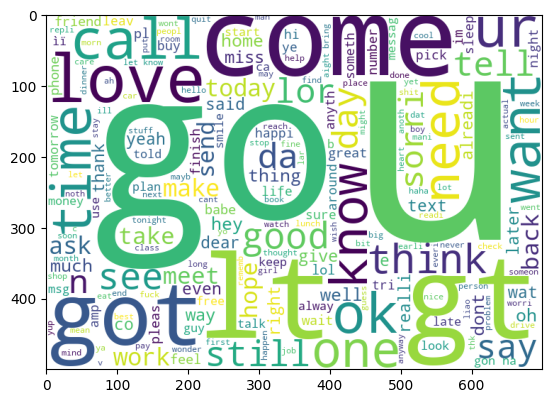

In [44]:
ham_wc = wc.generate(' '.join(df[df['label'] == 0]['transformed_text']))
plt.imshow(ham_wc)

In [45]:
spam_corpus = []
for text in df[df['label'] == 1]['transformed_text']:
    for word in text.split():
        spam_corpus.append(word)

spam_corpus[:10]

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt']

In [46]:
from collections import Counter
spam_count = pd.DataFrame(Counter(spam_corpus).most_common(30))
spam_count.columns = ['word', 'count']
spam_count.head()

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


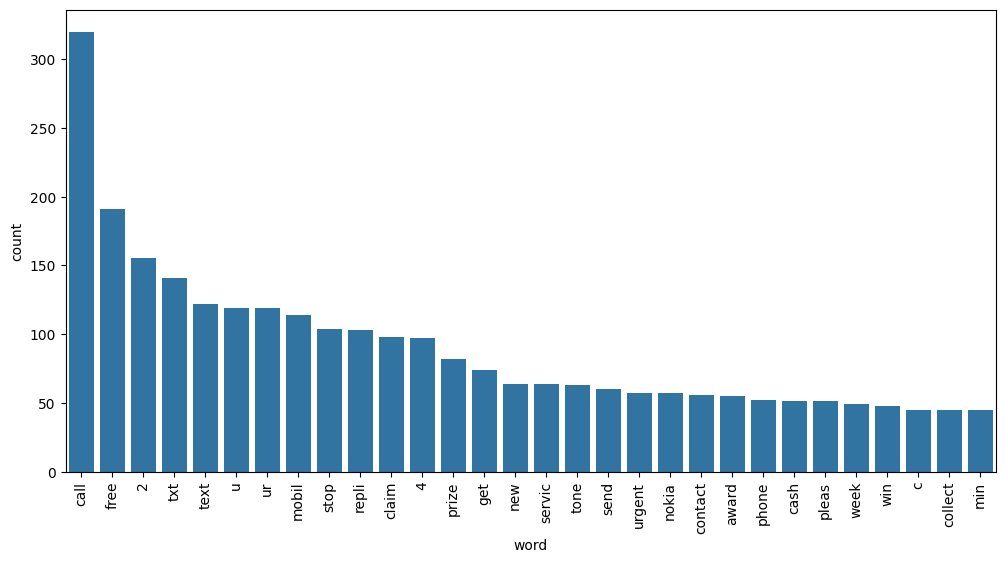

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=spam_count)
plt.xticks(rotation=90)
plt.show()

In [48]:
ham_corpus = []
for text in df[df['label'] == 0]['transformed_text']:
    for word in text.split():
        ham_corpus.append(word)

ham_corpus[:10]

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la']

In [49]:
ham_count = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_count.columns = ['word', 'count']
ham_count.head()

,word,count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


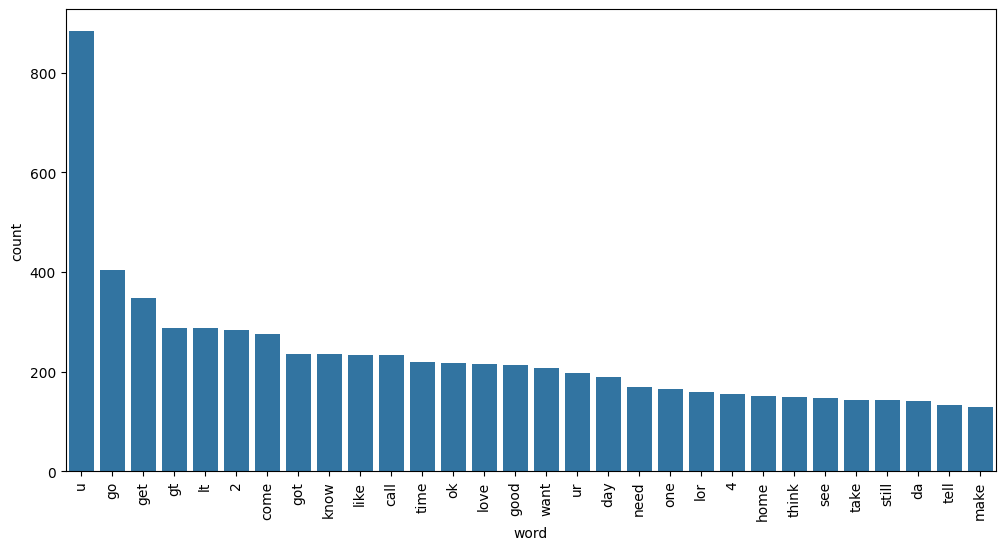

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=ham_count)
plt.xticks(rotation=90)
plt.show()

## 4. Model Building

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [52]:
X = cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [53]:
y = df['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, precision_score, accuracy_score, confusion_matrix

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.53      0.86      0.66       138

    accuracy                           0.88      1034
   macro avg       0.75      0.87      0.79      1034
weighted avg       0.92      0.88      0.89      1034

0.8800773694390716
0.5315315315315315


In [58]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.83      0.91      0.87       138

    accuracy                           0.96      1034
   macro avg       0.91      0.94      0.93      1034
weighted avg       0.97      0.96      0.96      1034

0.9642166344294004
0.8344370860927153


In [59]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(classification_report(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

0.9700193423597679
0.9734513274336283


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [73]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)

In [76]:
mnb.fit(X_train, y_train)
y_pred4 = mnb.predict(X_test)
print(classification_report(y_test, y_pred4))
print(accuracy_score(y_test, y_pred4))
print(precision_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.70      0.82       138

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034

0.9593810444874274
1.0
[[896   0]
 [ 42  96]]


In [77]:
#tfidf with multinomial naive bayes

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [79]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [80]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [81]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [82]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8543689320388349
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [83]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [84]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


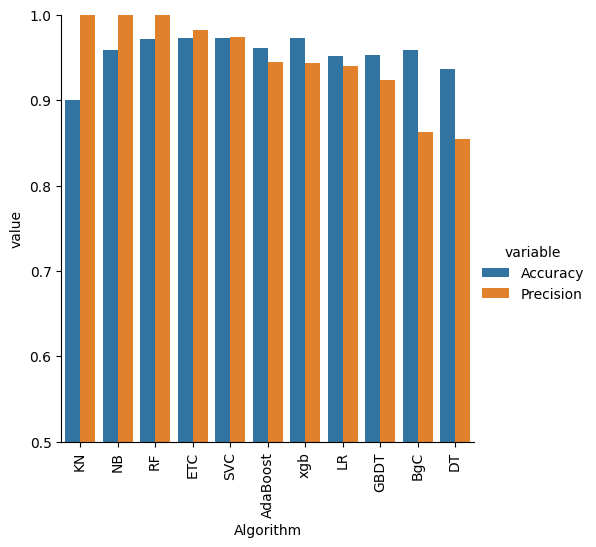

In [85]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## 5. Model Imorovement

In [86]:
# 1. Change the max_features parameter of TfIdf

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [89]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [90]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [92]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
2,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
3,ETC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
4,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
5,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
6,xgb,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548
7,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
8,GBDT,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
9,BgC,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595


In [93]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [94]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [95]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [96]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


In [97]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [98]:
from sklearn.ensemble import StackingClassifier

In [99]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [100]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))